# Speed Dating

## Contents

1) Initial exploration of the dataset
2) Principal 
3) Testing underlying assumptions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
pd.set_option("max_seq_items", None)
pd.set_option('display.max_rows', None, 'display.max_columns', None)


In [2]:
df = pd.read_csv("data\speed_dating_data.csv", encoding = "ISO-8859-1")


## General exploration of the dataset

In [3]:
df["age"].describe()

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

As there are a lot of columns in the dataset, I printed out the names of columns to get an overview of the features of the dataset.

In [4]:
print(df.columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

Let's check whether there are missing values in the dataset if any.

In [5]:

df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

## General characteristics of the dataset demographic.

Each participant in the study had a unique number ("iid"). The original dataset contains several rows for each iid, each row corresponding to a different partner that the person with the given iid met during speed dating. 

I grouped the dataset by the iid in order to count the number of unique participants in the study.

In [6]:
df_iid = df.groupby("iid").mean(numeric_only=True).reset_index(drop=False)

print(f"Total number of participants in this study: {len(df_iid)}")

Total number of participants in this study: 551


In the dataset, the column "gender" contains information whether the participant was male (1) or female (0). To avoid confusion, I chose to create a column "gender_name" where the gender of each participant is indicated explicitly as "Male" or "Female".

In [7]:
df_iid["gender_name"] = df_iid['gender'].apply(lambda x: "Male" if x==1 else "Female")
df_iid[['iid', 'gender', 'age', 'gender_name']].head()


,iid,gender,age,gender_name
0,1,0.0,21.0,Female
1,2,0.0,24.0,Female
2,3,0.0,25.0,Female
3,4,0.0,23.0,Female
4,5,0.0,21.0,Female


Each iid corresponds to a unique participant. I used the dataset grouped by iid to count the number of unique values in column "iid" to determine the total number of participants. I also used the dataset to count the number of men and women who participated in the study.

In [8]:
df_iid[df_iid["gender_name"] == "Male"].head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,gender_name
10,11,1.0,1.0,2.0,1.0,1.0,10.0,5.5,NaN,5.5,5.5,5.5,0.0,0.056,0.6,23.6,3.0,20.409,14.318,23.227,22.318,10.318,9.409,0.4,5.6,8.8,8.2,5.4,6.4,5.222222,6.2,5.200000,1.9,27.0,8.0,2.0,7.0,3.0,1.0,5.0,4.0,2.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,3.0,35.0,20.0,20.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,6.8,7.8,7.2,7.6,7.10,5.10,6.4,3.5,1.900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.51,17.07,17.07,17.07,12.20,17.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,35.0,25.0,15.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,Male
11,12,2.0,1.0,4.0,1.0,1.0,10.0,5.5,NaN,5.5,5.5,5.5,0.2,0.155,0.6,23.6,3.0,20.409,14.318,23.227,22.318,10.318,9.409,0.4,7.1,6.6,7.1,6.7,6.9,6.111111,6.9,4.200000,1.5,22.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,7.0,9.0,8.0,7.0,6.0,3.0,3.0,5.0,6.0,6.0,4.0,7.0,7.0,9.0,5.0,5.0,7.0,20.0,60.0,0.0,0.0,40.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,15.0,25.0,20.0,15.0,0.0,9.0,9.0,9.0,10.0,9.0,NaN,NaN,NaN,NaN,NaN,0.3,6.2,6.7,9.1,5.9,5.70,4.70,6.9,3.5,1.700,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
12,13,3.0,1.0,6.0,1.0,1.0,10.0,5.5,NaN,5.5,5.5,5.5,0.4,0.119,0.3,23.6,3.0,20.409,14.318,23.227,22.318,10.318,9.409,0.4,4.8,7.9,8.8,7.0,5.9,5.888889,6.4,5.111111,1.6,22.0,1.0,4.0,3.0,5.0,2.0,7.0,1.0,1.0,7.0,8.0,2.0,9.0,5.0,6.0,4.0,7.0,7.0,6.0,8.0,10.0,8.0,9.0,9.0,8.0,1.0,3.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,16.0,16.0,18.0,16.0,14.0,4.0,7.0,8.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,10.0,10.0,10.0,10.0,10.00,10.00,10.0,10.0,1.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,20.00,20.00,7.50,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7.0,7.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
13,14,4.0,1.0,8.0,1.0,1.0,10.0,5.5,NaN,5.5,5.5,5.5,0.8,-0.057,0.6,23.6,3.0,20.409,14.318,23.227,22.318,10.318,9.409,0.8,8.2,7.6,7.4,7.6,6.6,7.444444,7.7,5.500

In [9]:
nb_women = len(df_iid[df_iid["gender_name"] == "Female"])
nb_men = len(df_iid[df_iid["gender_name"] == "Male"])
print(f"There were {nb_men} male participants and {nb_women} female participants in the study.")


There were 277 male participants and 274 female participants in the study.


In [10]:
fig = px.box(df_iid, x="gender_name", y="age", color="gender_name", color_discrete_sequence=["#F78FE4", "#0460C9"])
fig.show()

In [11]:
type(df_iid[df_iid["gender_name"] == "Female"])

pandas.core.frame.DataFrame

In [12]:
import plotly.figure_factory as ff
import numpy as np

x1= df_iid[df_iid["gender_name"] == "Female"]["age"].dropna().copy()
x2= df_iid[df_iid["gender_name"] == "Male"]["age"].dropna().copy()
x1 = x1.to_numpy()
x2 = x2.to_numpy()

hist_data = [x1, x2]

group_labels = ['Female', 'Male']
colors = ["#F78FE4", "#0460C9"]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=1, show_rug=False)

# Add title
fig.update_layout(title_text='Hist and Curve Plot')
fig.show()

In [13]:
import plotly.figure_factory as ff
import numpy as np

x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2

hist_data = [x1, x2, x3]

group_labels = ['Group 1', 'Group 2', 'Group 3']
colors = ['#A56CC1', '#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=.2, show_rug=False)

# Add title
fig.update_layout(title_text='Hist and Curve Plot')
fig.show()

In [14]:

fig = px.histogram(df_iid, x="age",
             color='gender_name', barmode='group', color_discrete_sequence=["#F78FE4", "#1179f0"])
fig.show()

Education field:

In [15]:
len(df.columns)

195

In [16]:
len(df_iid.columns)

188

The initial dataset contained columns "field" and "field_cd". After groupby, only the numerical columns were left in the new dataframe, so I decided to recreate a column containing the name of the field of study.

In [17]:
df_iid['field_name'] = df_iid["field_cd"].apply(lambda x: "Law" if x == 1 
                                                    else "Math" if x == 2 
                                                    else "Social Science / Psychology" if x == 3 
                                                    else "Medical Science / Pharma / Biotech" if x == 4 
                                                    else "Engineering" if x==5
                                                    else "English / Creative Writing / Journalism" if x == 6 
                                                    else "History / Religion / Philosopy" if x == 7 
                                                    else "Business / Economy / Finance" if x == 8 
                                                    else "Education, Academia" if x==9
                                                    else "Biology / Chemistry / Physics" if x==10
                                                    else "Social Work" if x == 11
                                                    else "Undergrad / Undecided" if x == 12 
                                                    else "Political Science and International Affairs" if x == 13 
                                                    else "Film" if x==14
                                                    else "Fine Arts / Arts Administration" if x == 15 
                                                    else "Languages" if x == 16
                                                    else "Architecture" if x==17 
                                                    else "Other")

To have a more general view of the participants in the study, I wanted to: 
1) Regroup some fields of study chosen by the authors of the experiment into more general categories. I chose to group them according to the system used by the French ONISEP ("Office national d'information sur les enseignements et les professions") so that the categores are more understandable for a reader from France.
2) For each of the fields that were obtained in this manner, percentage of male and female students was calculated.

In [18]:
df_iid['field_name'] = df_iid["field_cd"].apply(lambda x: "Law" if x == 1 
                                                    else "Math" if x == 2 
                                                    else "Social Science / Psychology" if x == 3 
                                                    else "Medical Science / Pharma / Biotech" if x == 4 
                                                    else "Engineering" if x==5
                                                    else "English / Creative Writing / Journalism" if x == 6 
                                                    else "History / Religion / Philosopy" if x == 7 
                                                    else "Business / Economy / Finance" if x == 8 
                                                    else "Education, Academia" if x==9
                                                    else "Biology / Chemistry / Physics" if x==10
                                                    else "Social Work" if x == 11
                                                    else "Undergrad / Undecided" if x == 12 
                                                    else "Political Science and International Affairs" if x==13 
                                                    else "Film" if x==14
                                                    else "Fine Arts / Arts Administration" if x==15 
                                                    else "Languages" if x == 16
                                                    else "Architecture" if x==17 
                                                    else "Other")

In [19]:
df_iid['domain_of_study'] = df_iid["field_cd"].apply(lambda x: "Arts" if x==14 or x==15
                                                    else "Economy and Management" if x==8
                                                    else "Sciences" if x==2 or x==5 or x ==10
                                                    else "Medicine, Pharma, Biotech" if x==4
                                                    else "Education, Academia" if x==9
                                                    else "Law and Political Science" if x==1 or x==13
                                                    else "Literature and Languages" if x==6 or x ==16
                                                    else "Social Sciences, Humanities, Psychology" if x==3 or x==7
                                                    else "Education, Academia" if x==9
                                                    else "Social Work" if x==11
                                                    else "Architecture" if x==17
                                                    else "Undergrad / Undecided" if x==12
                                                    else "Other")

In [20]:
fig = px.histogram(df_iid, y="domain_of_study", opacity = 0.75).update_yaxes(categoryorder = "total ascending")
fig.show()

In [21]:
fig = px.histogram(df_iid, y="domain_of_study", opacity = 0.75, histnorm="percent").update_yaxes(categoryorder = "total ascending")
fig.show()

In [22]:
# make a variant with percentages shown on bars

In [23]:
df_iid.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,gender_name,field_name,domain_of_study
0,1,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.5,5.5,15.5,0.4,0.267,0.1,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.5,6.7,7.4,8.0,7.2,8.000000,7.1,6.85,5.7,1.900000,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0.8,5.7,7.3,7.3,6.8,6.3,6.5,6.5,5.888889,1.777778,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Female,Law,Law and Political Science
1,2,2.0,0.0,3.0,1.0,1.0,10.0,3.0,NaN,5.5,5.5,15.5,0.2,0.258,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.6,7.7,7.1,7.9,7.5,7.500000,6.5,7.60,5.5,1.900000,24.0,1.0,2.0,2.0,5.0,1.0,5.0,1.0,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0.4,6.4,7.0,7.7,6.1,6.5,5.7,6.6,5.900000,1.900000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,Female,Law,Law and Political Science
2,3,3.0,0.0,5.0,1.0,1.0,10.0,9.0,NaN,5.5,5.5,15.5,0.0,-0.136,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.5,6.5,7.1,7.3,6.2,7.111111,6.0,6.00,4.5,1.900000,25.0,2.0,2.0,8.0,4.0,6.0,3.0,1.0,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,8.1,8.6,9.4,7.7,8.8,8.1,8.2,7.000000,1.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Math,Sciences
3,4,4.0,0.0,7.0,1.0,1.0,10.0,6.0,NaN,5.5,5.5

In [24]:
new_df = df_iid[["domain_of_study", "gender_name"]]
new_df.head()

,domain_of_study,gender_name
0,Law and Political Science,Female
1,Law and Political Science,Female
2,Sciences,Female
3,Law and Political Science,Female
4,Law and Political Science,Female


In [25]:
domain_by_gender_series = new_df.groupby(["domain_of_study", "gender_name"]).size()

In [26]:
type(domain_by_gender_series)

pandas.core.series.Series

In [27]:
domain_by_gender_series

domain_of_study                          gender_name
Architecture                             Male             1
Arts                                     Female          12
                                         Male             6
Economy and Management                   Female          30
                                         Male           100
Education, Academia                      Female          35
                                         Male             5
Law and Political Science                Female          45
                                         Male            49
Literature and Languages                 Female          18
                                         Male             6
Medicine, Pharma, Biotech                Female           7
                                         Male             2
Other                                    Female           5
                                         Male             5
Sciences                                 Female

In [28]:
new_df = domain_by_gender_series.to_frame(name = 'size').reset_index()

In [29]:
new_df

,domain_of_study,gender_name,size
0,Architecture,Male,1
1,Arts,Female,12
2,Arts,Male,6
3,Economy and Management,Female,30
4,Economy and Management,Male,100
5,"Education, Academia",Female,35
6,"Education, Academia",Male,5
7,Law and Political Science,Female,45
8,Law and Political Science,Male,49
9,Literature and Languages,Female,18


In [30]:
group_weights = new_df.groupby('domain_of_study').aggregate(sum)
new_df['gender_percent_by_domain'] = new_df.apply(lambda row: row['size']/group_weights.loc[row['domain_of_study']][0],axis=1)

C:\Users\yuliy\AppData\Local\Temp\ipykernel_17784\3935170352.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [31]:
new_df

,domain_of_study,gender_name,size,gender_percent_by_domain
0,Architecture,Male,1,1.000000
1,Arts,Female,12,0.666667
2,Arts,Male,6,0.333333
3,Economy and Management,Female,30,0.230769
4,Economy and Management,Male,100,0.769231
5,"Education, Academia",Female,35,0.875000
6,"Education, Academia",Male,5,0.125000
7,Law and Political Science,Female,45,0.478723
8,Law and Political Science,Male,49,0.521277
9,Literature and Languages,Female,18,0.750000


In [32]:
new_df["percentage"] = new_df["gender_percent_by_domain"].apply(lambda x: str(round(x*100, 1)) + " %")

In [33]:
new_df

,domain_of_study,gender_name,size,gender_percent_by_domain,percentage
0,Architecture,Male,1,1.000000,100.0 %
1,Arts,Female,12,0.666667,66.7 %
2,Arts,Male,6,0.333333,33.3 %
3,Economy and Management,Female,30,0.230769,23.1 %
4,Economy and Management,Male,100,0.769231,76.9 %
5,"Education, Academia",Female,35,0.875000,87.5 %
6,"Education, Academia",Male,5,0.125000,12.5 %
7,Law and Political Science,Female,45,0.478723,47.9 %
8,Law and Political Science,Male,49,0.521277,52.1 %
9,Literature and Languages,Female,18,0.750000,75.0 %


In [34]:
new_df.sort_values(by=['gender_percent_by_domain'], inplace=True)

In [35]:
new_df

,domain_of_study,gender_name,size,gender_percent_by_domain,percentage
20,Social Work,Male,1,0.033333,3.3 %
6,"Education, Academia",Male,5,0.125000,12.5 %
12,"Medicine, Pharma, Biotech",Male,2,0.222222,22.2 %
3,Economy and Management,Female,30,0.230769,23.1 %
10,Literature and Languages,Male,6,0.250000,25.0 %
18,"Social Sciences, Humanities, Psychology",Male,19,0.301587,30.2 %
2,Arts,Male,6,0.333333,33.3 %
15,Sciences,Female,49,0.374046,37.4 %
7,Law and Political Science,Female,45,0.478723,47.9 %
13,Other,Female,5,0.500000,50.0 %


In [36]:

fig=px.bar(new_df, x='gender_percent_by_domain', y='domain_of_study',
            color=new_df['gender_name'], barmode ='stack', color_discrete_sequence=["#1179f0", "#F78FE4"], opacity = 0.85,
            text = new_df['percentage']).update_yaxes(categoryorder = "total descending")
fig.update_traces(textfont_color='#ffffff')
fig.show()


In [37]:
top_labels = new_df["gender_name"].unique()
top_labels

array(['Male', 'Female'], dtype=object)

In [38]:
y_data = new_df["domain_of_study"].unique()
y_data

array(['Social Work', 'Education, Academia', 'Medicine, Pharma, Biotech',
       'Economy and Management', 'Literature and Languages',
       'Social Sciences, Humanities, Psychology', 'Arts', 'Sciences',
       'Law and Political Science', 'Other', 'Architecture',
       'Undergrad / Undecided'], dtype=object)

In [39]:
new_df

,domain_of_study,gender_name,size,gender_percent_by_domain,percentage
20,Social Work,Male,1,0.033333,3.3 %
6,"Education, Academia",Male,5,0.125000,12.5 %
12,"Medicine, Pharma, Biotech",Male,2,0.222222,22.2 %
3,Economy and Management,Female,30,0.230769,23.1 %
10,Literature and Languages,Male,6,0.250000,25.0 %
18,"Social Sciences, Humanities, Psychology",Male,19,0.301587,30.2 %
2,Arts,Male,6,0.333333,33.3 %
15,Sciences,Female,49,0.374046,37.4 %
7,Law and Political Science,Female,45,0.478723,47.9 %
13,Other,Female,5,0.500000,50.0 %


In [40]:
new_df["gender_percent_by_domain"] = new_df["gender_percent_by_domain"].apply(lambda x: round((x * 100), 1))

In [41]:
table = pd.pivot_table(new_df, values=['size', 'gender_percent_by_domain'], index=['domain_of_study'], columns='gender_name', fill_value=0)

In [42]:
table

gender_percent_by_domain         \
gender_name                                               Female   Male   
domain_of_study                                                           
Architecture                                                 0.0  100.0   
Arts                                                        66.7   33.3   
Economy and Management                                      23.1   76.9   
Education, Academia                                         87.5   12.5   
Law and Political Science                                   47.9   52.1   
Literature and Languages                                    75.0   25.0   
Medicine, Pharma, Biotech                                   77.8   22.2   
Other                                                       50.0   50.0   
Sciences                                                    37.4   62.6   
Social Sciences, Humanities, Psychology                     69.8   30.2   
Social Work                                                 96.7    3.3   
Undergrad / Undecided                                        0.0  100.0   

                                          size       
gender_name                             Female Male  
domain_of_study                                      
Architecture                                 0    1  
Arts                                        12    6  
Economy and Management                      30  100  
Education, Academia                         35    5  
Law and Political Science                   45   49  
Literature and Languages                    18    6  
Medicine, Pharma, Biotech                    7    2  
Other                                        5    5  
Sciences                                    49   82  
Social Sciences, Humanities, Psychology     44   19  
Social Work                                 29    1  
Undergrad / Undecided                        0    1

In [43]:
table.sort_values(by=[('gender_percent_by_domain', 'Female')], inplace=True)

In [44]:
table

gender_percent_by_domain         \
gender_name                                               Female   Male   
domain_of_study                                                           
Architecture                                                 0.0  100.0   
Undergrad / Undecided                                        0.0  100.0   
Economy and Management                                      23.1   76.9   
Sciences                                                    37.4   62.6   
Law and Political Science                                   47.9   52.1   
Other                                                       50.0   50.0   
Arts                                                        66.7   33.3   
Social Sciences, Humanities, Psychology                     69.8   30.2   
Literature and Languages                                    75.0   25.0   
Medicine, Pharma, Biotech                                   77.8   22.2   
Education, Academia                                         87.5   12.5   
Social Work                                                 96.7    3.3   

                                          size       
gender_name                             Female Male  
domain_of_study                                      
Architecture                                 0    1  
Undergrad / Undecided                        0    1  
Economy and Management                      30  100  
Sciences                                    49   82  
Law and Political Science                   45   49  
Other                                        5    5  
Arts                                        12    6  
Social Sciences, Humanities, Psychology     44   19  
Literature and Languages                    18    6  
Medicine, Pharma, Biotech                    7    2  
Education, Academia                         35    5  
Social Work                                 29    1

In [45]:
values_list = table.values.tolist()
print(values_list)

[[0.0, 100.0, 0.0, 1.0], [0.0, 100.0, 0.0, 1.0], [23.1, 76.9, 30.0, 100.0], [37.4, 62.6, 49.0, 82.0], [47.9, 52.1, 45.0, 49.0], [50.0, 50.0, 5.0, 5.0], [66.7, 33.3, 12.0, 6.0], [69.8, 30.2, 44.0, 19.0], [75.0, 25.0, 18.0, 6.0], [77.8, 22.2, 7.0, 2.0], [87.5, 12.5, 35.0, 5.0], [96.7, 3.3, 29.0, 1.0]]


In [46]:
values_list[0]

[0.0, 100.0, 0.0, 1.0]

In [47]:
list_of_percentages_by_gender = []
for sublist in values_list:
    list_of_percentages_by_gender.append(sublist[:2])
    print(sublist[:2])
    #percent_values = sublist[:1]
    #list_of_percentages_by_gender.append(percent_values)

#print(sublist)

print(list_of_percentages_by_gender)


[0.0, 100.0]
[0.0, 100.0]
[23.1, 76.9]
[37.4, 62.6]
[47.9, 52.1]
[50.0, 50.0]
[66.7, 33.3]
[69.8, 30.2]
[75.0, 25.0]
[77.8, 22.2]
[87.5, 12.5]
[96.7, 3.3]
[[0.0, 100.0], [0.0, 100.0], [23.1, 76.9], [37.4, 62.6], [47.9, 52.1], [50.0, 50.0], [66.7, 33.3], [69.8, 30.2], [75.0, 25.0], [77.8, 22.2], [87.5, 12.5], [96.7, 3.3]]


In [48]:
"""L = [['a','bob'],['a','bob'],['a','john']]
for i, x in enumerate(L):
    for j, a in enumerate(x):
        if 'bob' in a:
            L[i][j] = a.replace('bob', 'b')

print(L)"""

"L = [['a','bob'],['a','bob'],['a','john']]\nfor i, x in enumerate(L):\n    for j, a in enumerate(x):\n        if 'bob' in a:\n            L[i][j] = a.replace('bob', 'b')\n\nprint(L)"

In [49]:
"""L = [[1.0, 0.0],[0.0, 2.36],[1.2, 0.0]]
for i, x in enumerate(L):
    for j, a in enumerate(x):
        if a==0.0:
            L[i][j] = None

print(L)"""

'L = [[1.0, 0.0],[0.0, 2.36],[1.2, 0.0]]\nfor i, x in enumerate(L):\n    for j, a in enumerate(x):\n        if a==0.0:\n            L[i][j] = None\n\nprint(L)'

In [50]:
"""for i, x in enumerate(list_of_percentages_by_gender):
    for j, a in enumerate(x):
        if a==0.0:
            list_of_percentages_by_gender[i][j] = None

print(list_of_percentages_by_gender)"""

'for i, x in enumerate(list_of_percentages_by_gender):\n    for j, a in enumerate(x):\n        if a==0.0:\n            list_of_percentages_by_gender[i][j] = None\n\nprint(list_of_percentages_by_gender)'

In [51]:
# Final version of the histogram

colors = ["#F78FE4", "#1179f0"]
gender_name = ["Female", "Male"]

# x_data is the number of occurrences in each category: that is, number of men and women per domain of study
x_data = list_of_percentages_by_gender

y_data = table.index

fig = go.Figure()

for i in range(0, len(x_data[0])): # x_data[0] is the list that contains the number of 
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            name = gender_name[i],
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text = str(xd[0]) + '%' if xd[0]>5 else '',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

                                
    space = xd[0]

    # labeling the rest of percentages for each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    #text=str(xd[i]) + '%',
                                    #rate = lambda T: 200*exp(-T) if T>200 else 400*exp(-T)
                                    #value = 'Test' if 1 == 1 else 'NoTest'
                                    text = str(xd[i]) + '%' if xd[i]>5 else '',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))

    space += xd[i]

fig.update_layout(annotations=annotations, 
                  margin = {'l': 160}) # to avoid cropping of column names

fig.show()


In [52]:
"""fig=px.bar(new_df, x='gender_percent_by_domain', y='domain_of_study',
            color=new_df['gender_name'], barmode ='stack', color_discrete_sequence=["#1179f0", "#F78FE4"], opacity = 0.85,
            text = new_df['percentage']).update_yaxes(categoryorder = "total ascending")
fig.update_traces(textfont_color='#ffffff')
fig.show()"""

'fig=px.bar(new_df, x=\'gender_percent_by_domain\', y=\'domain_of_study\',\n            color=new_df[\'gender_name\'], barmode =\'stack\', color_discrete_sequence=["#1179f0", "#F78FE4"], opacity = 0.85,\n            text = new_df[\'percentage\']).update_yaxes(categoryorder = "total ascending")\nfig.update_traces(textfont_color=\'#ffffff\')\nfig.show()'

In [53]:
df_iid.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,gender_name,field_name,domain_of_study
0,1,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.5,5.5,15.5,0.4,0.267,0.1,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.5,6.7,7.4,8.0,7.2,8.000000,7.1,6.85,5.7,1.900000,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0.8,5.7,7.3,7.3,6.8,6.3,6.5,6.5,5.888889,1.777778,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Female,Law,Law and Political Science
1,2,2.0,0.0,3.0,1.0,1.0,10.0,3.0,NaN,5.5,5.5,15.5,0.2,0.258,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.6,7.7,7.1,7.9,7.5,7.500000,6.5,7.60,5.5,1.900000,24.0,1.0,2.0,2.0,5.0,1.0,5.0,1.0,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0.4,6.4,7.0,7.7,6.1,6.5,5.7,6.6,5.900000,1.900000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,Female,Law,Law and Political Science
2,3,3.0,0.0,5.0,1.0,1.0,10.0,9.0,NaN,5.5,5.5,15.5,0.0,-0.136,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.5,6.5,7.1,7.3,6.2,7.111111,6.0,6.00,4.5,1.900000,25.0,2.0,2.0,8.0,4.0,6.0,3.0,1.0,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,8.1,8.6,9.4,7.7,8.8,8.1,8.2,7.000000,1.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,Math,Sciences
3,4,4.0,0.0,7.0,1.0,1.0,10.0,6.0,NaN,5.5,5.5

In [54]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [55]:
len(df["income"])

8378

In [56]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [57]:
df_income = df.dropna(subset=['income'])

In [58]:
len(df_income)

4279

Income:

The authors of the experiment did not ask for income directly but inferred it from the zipcode of the area where the participant grew up. Therefore the income provided in the dataset for each person is in fact the median household income in the area where the person grew up (according to the US Census Bureau data at the time of the experiment).


In [59]:
def cols_with_mixed_data_types(df):
# function for determining if there are multiple data types in a pandas dataframe:
    for column in df.columns:
        if len(df[column].map(type).unique())>1:
            print(f"{column}: {df[column].map(type).unique()}")


In [60]:
cols_with_mixed_data_types(df_income)

undergra: [<class 'float'> <class 'str'>]
mn_sat: [<class 'float'> <class 'str'>]
tuition: [<class 'float'> <class 'str'>]


In [61]:
df_income["income"].head()

0    69,487.00
1    69,487.00
2    69,487.00
3    69,487.00
4    69,487.00
Name: income, dtype: object

In [62]:
df_income['income'] = df_income['income'].astype(str)


In [63]:
cols_with_mixed_data_types(df_income)

undergra: [<class 'float'> <class 'str'>]
mn_sat: [<class 'float'> <class 'str'>]
tuition: [<class 'float'> <class 'str'>]


In [64]:
df_income.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [65]:
df_income['income'].head()

0    69,487.00
1    69,487.00
2    69,487.00
3    69,487.00
4    69,487.00
Name: income, dtype: object

In [66]:
df_income['income'] = df_income['income'].apply(lambda x: x.split(".")[0])

In [67]:
df_income['income'].head()

0    69,487
1    69,487
2    69,487
3    69,487
4    69,487
Name: income, dtype: object

In [68]:
df_income['income'] = df_income['income'].apply((lambda x: x.replace(",", "").split(".")[0]))

In [69]:
df_income['income'].head()

0    69487
1    69487
2    69487
3    69487
4    69487
Name: income, dtype: object

In [70]:
df_income['income'] = df_income['income'].astype(float)

In [71]:
df_income['income'].head()

0    69487.0
1    69487.0
2    69487.0
3    69487.0
4    69487.0
Name: income, dtype: float64

In [72]:
df_income_iid = df_income.groupby("iid").mean(numeric_only=True).reset_index(drop=False)

In [73]:
print(min(df_income_iid["income"]))

8607.0


In [74]:
len(df_income_iid)

281

In [75]:
df_income_iid["income"].value_counts().sort_index()

8607.0      1
12063.0     1
12416.0     1
15863.0     1
16767.0     2
16908.0     1
17134.0     1
17378.0     1
18283.0     1
18619.0     1
19264.0     1
20000.0     1
21488.0     1
21590.0     1
21597.0     1
22161.0     1
22173.0     1
22439.0     1
22669.0     1
22805.0     1
23152.0     1
23207.0     1
23361.0     1
23707.0     1
23988.0     1
24997.0     1
25314.0     1
25401.0     2
25589.0     1
25786.0     1
25831.0     1
26298.0     1
26482.0     1
26645.0     1
26682.0     1
26706.0     1
27094.0     1
27248.0     1
27503.0     1
27794.0     1
28240.0     1
28317.0     1
28418.0     1
28524.0     1
28759.0     1
28891.0     1
28989.0     1
29236.0     1
29237.0     1
29279.0     1
29575.0     1
29746.0     1
29809.0     1
30038.0     2
30146.0     1
30147.0     1
30587.0     1
30768.0     1
30855.0     1
30973.0     1
31143.0     1
31148.0     1
31383.0     1
31432.0     1
31486.0     1
31516.0     1
31560.0     1
31632.0     1
31809.0     1
31857.0     1
32129.0     1
32159.

In [76]:
print(f"Minimum recorded income: {min(df_income_iid['income'])}")
print(f"Maximum recorded income: {max(df_income_iid['income'])}")

Minimum recorded income: 8607.0
Maximum recorded income: 109031.0


In [77]:
df_income_iid.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd',
       'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1',
       'sinc5_1', 'intel5_1

In [78]:
df_income_iid["gender_name"] = df_income_iid['gender'].apply(lambda x: "Male" if x==1 else "Female")
df_income_iid[['iid', 'gender', 'gender_name', 'income']].head()

,iid,gender,gender_name,income
0,1,0.0,Female,69487.0
1,2,0.0,Female,65929.0
2,4,0.0,Female,37754.0
3,5,0.0,Female,86340.0
4,6,0.0,Female,60304.0


In order to analyze the income of the participants, we'll create a column where 

In [79]:
df_income_iid["income_distribution"] = "Income Distribution"

In [80]:

# shorter version of a single split violin plot:
fig = go.Figure()

genders = df_income_iid["gender_name"].unique()

for gender in genders:
    fig.add_trace(go.Violin(x=df_income_iid['income_distribution'][df_income_iid['gender_name'] == gender ],
                        y=df_income_iid['income'][df_income_iid['gender_name'] == gender ],
                        legendgroup=gender, scalegroup=gender, name=gender,
                        side='negative' if gender=='Male' else 'positive',
                        line_color="#0460C9" if gender=='Male' else '#F78FE4', 
                        box_visible=True)
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.65, violinmode='overlay')
fig.show()

Motivation:

The authors asked each participant to indicate their goal for participating in the speed dating experiment.

In [81]:
df_iid['participant_goal'] = df_iid["goal"].apply(lambda x: "Seemed like a fun night out" if x == 1 
                                                    else "To meet new people" if x == 2 
                                                    else "To get a date" if x == 3 
                                                    else "Looking for a serious relationship" if x == 4 
                                                    else "To say I did it" if x==5 
                                                    else "Other")

In [82]:
import plotly.express as px
fig = px.histogram(df_iid, y="participant_goal",
             color='gender_name', barmode='group', color_discrete_sequence=["#F78FE4", "#1179f0"], opacity=0.60, histnorm = 'percent')
fig.show()

In [83]:
fig = px.histogram(df_iid, y="participant_goal",
             color='gender_name', barmode='group', color_discrete_sequence=["#F78FE4", "#1179f0"], opacity=0.60, histnorm = 'percent')
fig.show()

Percent successful matches:

In [84]:
df_match=df[["iid", "pid", "match"]]

In [85]:
np.sort(df_match.iloc[:, :3], axis = 1)

array([[  0.,   1.,  11.],
       [  0.,   1.,  12.],
       [  1.,   1.,  13.],
       ...,
       [  0., 528., 552.],
       [  0., 529., 552.],
       [  0., 530., 552.]])

In [86]:
len(np.sort(df_match.iloc[:, :3]))

8378

In [87]:
#np.sort(df_match.iloc[:, :2])

In [88]:
len(df_match)

8378

In [89]:
pd.DataFrame(np.sort(df_match.iloc[:, :3])).tail()

,0,1,2
8373,0.0,526.0,552.0
8374,0.0,527.0,552.0
8375,0.0,528.0,552.0
8376,0.0,529.0,552.0
8377,0.0,530.0,552.0


In [90]:

df_match = df_match.loc[~pd.DataFrame(np.sort(df_match.iloc[:, :3])).duplicated()]
#df_match.reset_index(inplace=True)

In [91]:
len(df_match)

4194

In [92]:
df_match.reset_index(drop=True, inplace=True)

In [93]:
len(df_match)

4194

In [94]:
df_match.head()

,iid,pid,match
0,1,11.0,0
1,1,12.0,0
2,1,13.0,1
3,1,14.0,1
4,1,15.0,1


In [95]:
df_match.tail()

,iid,pid,match
4189,530,548.0,0
4190,530,549.0,0
4191,530,550.0,0
4192,530,551.0,0
4193,530,552.0,0


In [96]:
df_match["match"] = df_match["match"].apply(lambda x: "Yes" if x ==1 else "No")

In [97]:
df_match.head(10)

,iid,pid,match
0,1,11.0,No
1,1,12.0,No
2,1,13.0,Yes
3,1,14.0,Yes
4,1,15.0,Yes
5,1,16.0,No
6,1,17.0,No
7,1,18.0,No
8,1,19.0,Yes
9,1,20.0,No


In [98]:
df_match_grouped = df_match.groupby('match').size().reset_index(name='count')
df_match_grouped['percentage'] = df_match_grouped['count'].apply(lambda x: x / df_match_grouped['count'].sum())
df_match_grouped

,match,count,percentage
0,No,3504,0.835479
1,Yes,690,0.164521


In [186]:
# create pie chart using Plotly Express
fig = px.pie(df_match_grouped, values='percentage', names='match', 
             color_discrete_sequence=['#d8d7d7', 'green'],
             title='Match Ratio')
fig.show()

### What makes people interested in each other?

In [100]:
100*df.isnull().sum()/df.shape[0]
type(100*df.isnull().sum()/df.shape[0])
sd_series = 100*df.isnull().sum()/df.shape[0]
sd_series.index
type(sd_series.index)
type(sd_series.index[0])

str

There are a lot of missing values in the dataset. For the purposes of the further analysis, we will only include columns where at least 70% of values are not missing.

In [102]:
valid_columns_list = []
for i in range(0, len(sd_series.index)):
    if sd_series[i]<=30:
        valid_columns_list.append(sd_series.index[i])


print(valid_columns_list)

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 

In [103]:
speed_dating_df = df[valid_columns_list]
speed_dating_df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.00,10.00,20.00,10.00,10.00,20.00,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
5,1,1.0,0,1,1,1,10,7,NaN,6,6,16.0,0,0.25,0,25.0,2.0,50.00,0.00,30.00,10.00,0.00,10.00,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
6,1,1.0,0,1,1,1,10,7,NaN,1,7,17.0,0,0.34,0,30.0,2.0,35.00,15.00,25.00,10.00,5.00,10.00,0,3.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.

In order to check whether whether age difference influences matches, we create the column 'age_difference' that will contain the absolute value of the age difference between the partners.

In [198]:
speed_dating_df['age_difference']=abs(speed_dating_df['age_o']-speed_dating_df['age'])

In [199]:
speed_dating_df["gender_name"] = speed_dating_df['gender'].apply(lambda x: "Male" if x==1 else "Female")

In [203]:
iid_df = speed_dating_df.groupby(by = 'iid').mean(numeric_only = True).reset_index()
iid_df["gender_name"] = iid_df['gender'].apply(lambda x: "Male" if x==1 else "Female")
iid_df.head()
len(iid_df)

551

In [204]:
iid_df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,age_difference,gender_name
0,1,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.5,5.5,15.5,0.4,0.267,0.1,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.5,6.7,7.4,8.0,7.2,8.000000,7.1,6.85,5.7,1.900000,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0.8,5.7,7.3,7.3,6.8,6.3,6.5,6.5,5.888889,1.777778,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0,4.2,Female
1,2,2.0,0.0,3.0,1.0,1.0,10.0,3.0,NaN,5.5,5.5,15.5,0.2,0.258,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.6,7.7,7.1,7.9,7.5,7.500000,6.5,7.60,5.5,1.900000,24.0,1.0,2.0,2.0,5.0,1.0,5.0,1.0,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,0.4,6.4,7.0,7.7,6.1,6.5,5.7,6.6,5.900000,1.900000,3.0,5.0,2.0,NaN,18.92,18.92,21.62,27.03,5.41,8.11,7.0,6.0,8.0,9.0,4.0,2.2,Female
2,3,3.0,0.0,5.0,1.0,1.0,10.0,9.0,NaN,5.5,5.5,15.5,0.0,-0.136,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.5,6.5,7.1,7.3,6.2,7.111111,6.0,6.00,4.5,1.900000,25.0,2.0,2.0,8.0,4.0,6.0,3.0,1.0,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,0.0,8.1,8.6,9.4,7.7,8.8,8.1,8.2,7.000000,1.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,Female
3,4,4.0,0.0,7.0,1.0,1.0,10.0,6.0,NaN,5.5,5.5,15.5,0.2,-0.007,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.6,7.0,7.1,7.7,7.5,7.700000,7.2,7.30,6.5,1.777778,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,0.3,6.4,8.9,8.6,7.8,7.8,7.1,6.6,5.200000,1.800000,2.0,4.0,3.0,2.0,24.14,13.79,20.69,27.59,10.34,3.45,6.0,8.0,7.0,8.0,6.0,2.6,Female
4,5,5.0,0.0,9.0,1.0,1.0,10.0,4.0,NaN,5.5,5.5,15.5,0.2,-0.079,0.8,25.2,2.3,44.233,7.911,16.511,16.911,4.511,9.922,0.3,5.3,7.7,7.6,7.2,7.800000,6.2,6.10,6.5,1.700000,21.0,1.0,2.0,8.0,1.0,2.0,4.0,1.0,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,0.6,6.3,6.0,7.0,6.0,5.6,6.2,7.2,3.700000,1.700000,NaN,7.0,2.0,2.0,15.79,13.16,18.42,15.79,15.79,21.05,6.0,6.0,9.0,9.0,9.0,4.2,Female


For some columns, the information will be the same for the same couple of ids: e.g. a row where a participant's unique id ('iid') is **1** and their partner's unique id ('pid') is **11** will contain the same information for columns 'samerace', 'int_corr' (correlation between participant’s and partner’s ratings of interests at the time of signup for the experiment), 'age_difference' as the row with 'iid' is **11** and 'pid' is **1**. This means that for these columns the information is actually duplicated in the table. For such columns, we will only leave one row per couple.

In [105]:
couples_df=speed_dating_df[["iid", "pid", "match", "samerace", "int_corr", 'age_difference']]
len(couples_df)

8378

In [106]:
couples_df = couples_df.groupby(couples_df.apply(frozenset, axis=1)).first()
len(couples_df)

4304

In [107]:
couples_df = couples_df.sort_values(by = 'iid')
couples_df.reset_index(drop = True).head()

,iid,pid,match,samerace,int_corr,age_difference
0,1,11.0,0,0,0.14,6.0
1,1,19.0,1,0,0.28,7.0
2,1,18.0,0,0,0.50,6.0
3,1,17.0,0,0,0.34,9.0
4,1,16.0,0,0,0.25,4.0


In [108]:
100*df.isnull().sum()/df.shape[0]

iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
wave         0.000000
round        0.000000
position     0.000000
positin1    22.033898
order        0.000000
partner      0.000000
pid          0.119360
match        0.000000
int_corr     1.885892
samerace     0.000000
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
dec_o        0.000000
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal      

In [109]:
couples_df['samerace'].value_counts()

0    2618
1    1686
Name: samerace, dtype: int64

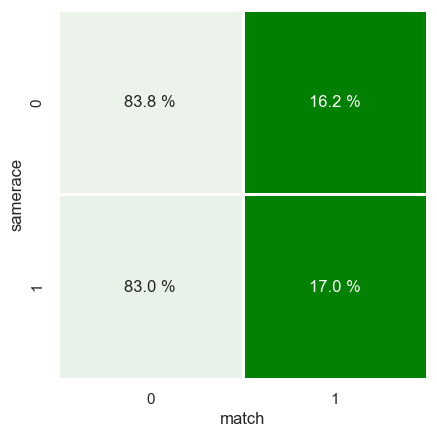

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

cmap = sns.light_palette("green", as_cmap=True, reverse=True)

sns.set()
fig, ax0 = plt.subplots(1,1)
cont_table = pd.crosstab(index=couples_df['samerace'], columns=couples_df['match'], normalize='index')*100
ax = sns.heatmap(cont_table, annot=True, fmt = '.1f', cmap=cmap, square=1, linewidth=1., cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

Matches happened for 16.2 % of couples where partners were of different race and for 17 % of couples where partners were of different races. The race therefore seems of minor importance for the participants of the experiment.

In [181]:
import plotly.express as px
import pandas as pd

# create a box plot using plotly.express
fig = px.box(couples_df, x='match', y='age_difference', color='match', color_discrete_map={0 :'grey', 1 :'green'})

# set axis labels and title
fig.update_layout(
    xaxis=dict(title='Match'),
    yaxis=dict(title='Age difference'),
    title='Match by age difference'
)

# show the plot
fig.show()

It looks like in the majority of cases, the age difference between partners matters little in terms 

In [182]:
import plotly.express as px
import pandas as pd

# create a box plot using plotly.express
fig = px.box(couples_df, x='match', y='int_corr', color='match', color_discrete_map={0 :'grey', 1 :'green'})

# set axis labels and title
fig.update_layout(
    xaxis=dict(title='Match'),
    yaxis=dict(title='Correlation of interests'),
    title='Match and correlation of interests'
)

# show the plot
fig.show()

In general, how frequently do you go on dates?
- Several times a week=1
- Twice a week=2
- Once a week=3
- Twice a month=4
- Once a month=5
- Several times a year=6
- Almost never=7


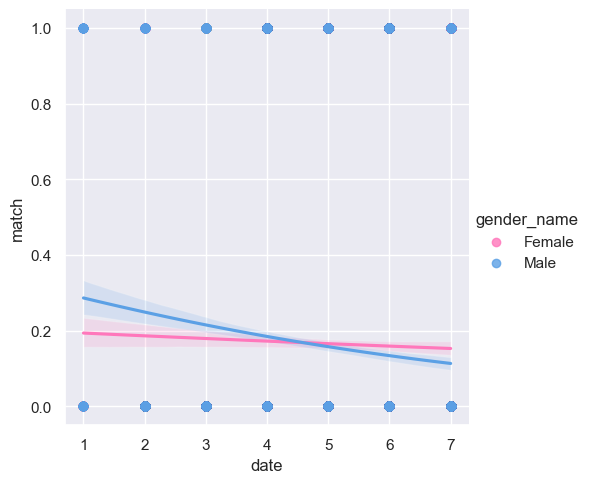

In [208]:
gender_palette = sns.color_palette(["#ff77bb", "#5ba0e5"])
sns.lmplot(x="date", y="match", data=speed_dating_df, hue = "gender_name", logistic=True, palette = gender_palette)

How often do you go out (not necessarily on dates)?
- Several times a week=1
- Twice a week=2
- Once a week=3
- Twice a month=4
- Once a month=5
- Several times a year=6
- Almost never=7


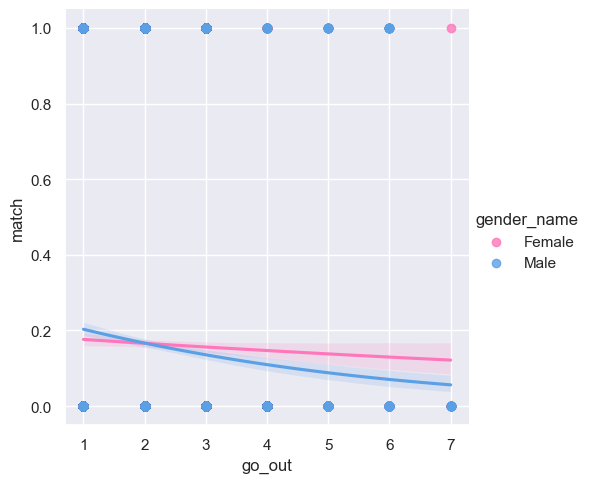

In [207]:
sns.lmplot(x="go_out", y="match", data=speed_dating_df, hue = "gender_name", logistic=True, palette = gender_palette)

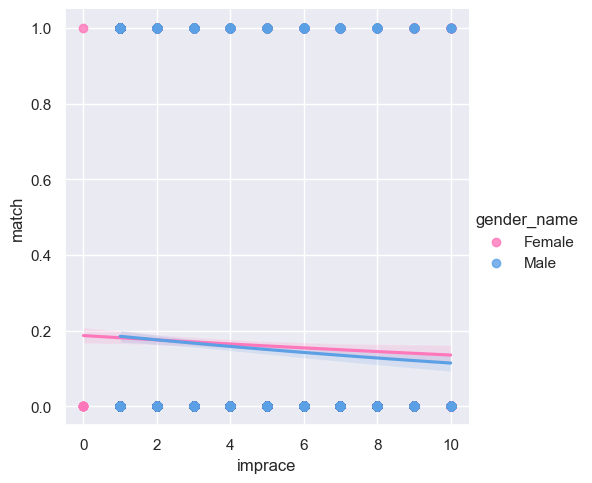

In [209]:
gender_palette = sns.color_palette(["#ff77bb", "#5ba0e5"])
sns.lmplot(x="imprace", y="match", data=speed_dating_df, hue = "gender_name", logistic=True, palette = gender_palette)

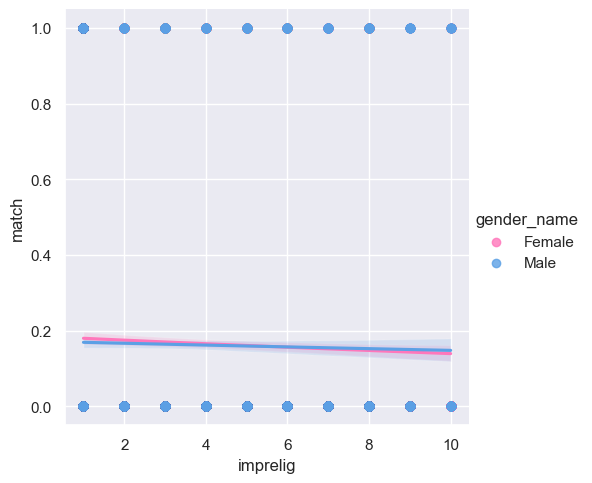

In [215]:
gender_palette = sns.color_palette(["#ff77bb", "#5ba0e5"])
sns.lmplot(x="imprelig", y="match", data=speed_dating_df, hue = "gender_name", logistic=True, palette = gender_palette)

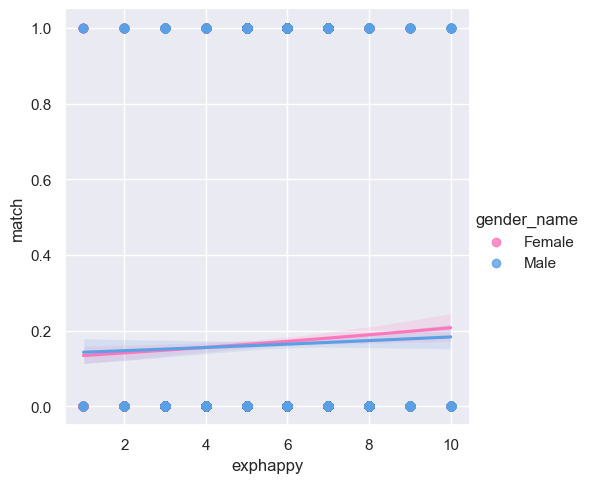

In [213]:
gender_palette = sns.color_palette(["#ff77bb", "#5ba0e5"])
sns.lmplot(x="exphappy", y="match", data=speed_dating_df, hue = "gender_name", logistic=True, palette = gender_palette)

Let's explore motivation for dating for men and women who participated in the study.
As the goals in the dataset are coded with numbers, let's create an additional column that will describe the goal explicitly according to the dataset key.

In [113]:
dating_per_person['goal_name'] = dating_per_person["goal"].apply(lambda x: "Seemed like a fun night out" if x == 1 else "To meet new people" if x == 2 else "To get a date" if x == 3 else "Looking for a serious relationship" if x == 4 else "To say I did it" if x==5 else "Other" if x==6 else None)
#dating_per_person.head(15)

NameError: name 'dating_per_person' is not defined

Let's represent different goals by a separate pie chart for both genders.

In [ ]:
dating_females = dating_per_person.loc[dating_per_person['gender_name'] == 'Female']
#display(dating_females.head())
females_by_goal = dating_females["goal_name"].value_counts(dropna=False)
#display(females_by_goal)

females_by_goal_array = females_by_goal.to_numpy()


labels = 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Other', 'To say I did it', 'Looking for a serious relationship', 'N/A'
sizes = females_by_goal_array

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
dating_males = dating_per_person.loc[dating_per_person['gender_name'] == 'Male']
#display(dating_males.head())
males_by_goal = dating_males["goal_name"].value_counts(dropna=False)
#display(males_by_goal)

males_by_goal_array = males_by_goal.to_numpy()

labels = 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Other', 'To say I did it', 'Looking for a serious relationship', 'N/A'
sizes = males_by_goal_array

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()


In [ ]:
import numpy as np
females_by_goal_array = females_by_goal.to_numpy()

labels = 'Seemed like a fun night out', 'To meet new people', 'To get a date', 'Other', 'To say I did it', 'Looking for a serious relationship', 'N/A'
sizes = females_by_goal_array

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1, 1))


plt.show()

In [ ]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
#dating_per_person['note_method'] = dating_per_person["wave"].apply(lambda x: '10_scale' if x == 6.0 or 7.0 or 8.0 or 9.0 else "100_point_alloc")
dating_per_person['note_method'] = dating_per_person["wave"].apply(lambda x: '10_scale' if x == 6 or x == 7 or x == 8 or x == 9 else "100_point_alloc")

In [ ]:
dating_per_person.head()

In [ ]:
dating_per_person_10_scale_mask = dating_per_person["note_method"]=="10_scale"
dating_per_person_10_scale = dating_per_person[dating_per_person_10_scale_mask].reset_index(drop=False)
dating_per_person_10_scale.head()

In [ ]:
dating_per_person_100_point_mask = dating_per_person["note_method"]=="100_point_alloc"
dating_per_person_100_point = dating_per_person[dating_per_person_100_point_mask].reset_index(drop=False)
dating_per_person_100_point.head()

In [ ]:
# creating a dataframe that contaings estimates of criteria that are important in opposite sex:
dating_per_person_100_point = dating_per_person_100_point.groupby("gender_name").mean().reset_index(drop=False)
dating_per_person_100_point_by_gender = dating_per_person_100_point[["gender_name",'iid', 'match', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2',
       'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']]
dating_per_person_100_point_by_gender

In [ ]:
a = 23.737295 + 17.284344 + 20.490410 + 17.266721 + 10.174208 + 11.235574
print(a)